# Second Level Analysis 
Shout out to Emma Risgaard Olsen and Sirid Wihlborg. This notebook was modified from their code which can be found on GitHub (https://github.com/emmarisgaardolsen/BSc_project_fMRI/blob/main/fmri_analysis_scripts/second_level.ipynb).


In [3]:
import pickle
import glob
import os
import numpy as np
import pandas as pd
import glob
from nilearn import plotting
from pathlib import Path

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

## Load first level models

Load the first level models generated by the `fit_first_level.py` script

In [4]:
path_to_first_level = Path("/work/LauraBockPaulsen#1941/fMRI_analysis/flms")
flm_files = [f for f in path_to_first_level.iterdir() if f.is_file()]

flms = []

for model in flm_files: # looping over the flms and loading them
    flm_model = pickle.load(open(model,'rb')) 
    flms.append(flm_model)

In [7]:

zmaps_but_neg = flms[0].compute_contrast('button_press - negative', output_type='z_score') # avg (across participants) group-lvl contrast of "emotional" - neutral


/work/LauraBockPaulsen#1941/advanced_cogneuro/env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:706: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f'One contrast given, assuming it for all {int(n_runs)} runs')


## Create second level model

In [3]:
from nilearn.glm.second_level import SecondLevelModel

slm = SecondLevelModel(smoothing_fwhm=8.0)
slm.fit(flms)

## Compute contrasts

## Button vs negative

In [5]:
from nilearn.glm import threshold_stats_img

In [6]:
zmaps_but_neg = slm.compute_contrast(first_level_contrast='button_press - negative', output_type='z_score') # avg (across participants) group-lvl contrast of "emotional" - neutral

thresholded_map_but_neg, threshold_but_neg = threshold_stats_img(
    zmaps_but_neg, 
    alpha=.05, 
    height_control='bonferroni') 
    
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold_but_neg)

/work/LauraBockPaulsen#1941/fMRI_analysis/env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:799: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f"One contrast given, assuming it for all {int(n_runs)} runs")


The p<.05 Bonferroni-corrected threshold is 5.04


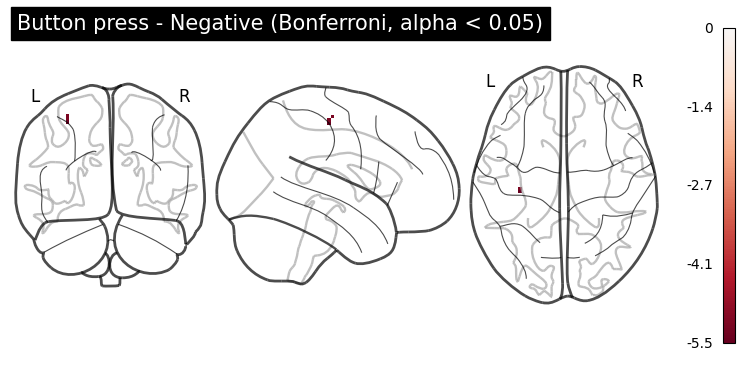

In [7]:
plotting.plot_glass_brain(thresholded_map_but_neg, colorbar=True,
                          title="Button press - Negative (Bonferroni, alpha < 0.05)",
                          plot_abs=False, cmap='RdBu')
plotting.show()

## Positive vs negative

In [10]:
zmaps_pos_neg = slm.compute_contrast(first_level_contrast='positive - negative', output_type='z_score')

from nilearn.glm import threshold_stats_img

thresholded_map_pos_neg, threshold_pos_neg = threshold_stats_img(
    zmaps_pos_neg, 
    alpha=.05, 
    height_control='bonferroni') 
    
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold_pos_neg)


The p<.05 Bonferroni-corrected threshold is 5.04


/work/LauraBockPaulsen#1941/fMRI_analysis/env/lib/python3.10/site-packages/nilearn/_utils/param_validation.py:72: UserWarning: The given float value must not exceed 4.159596170385151. But, you have given threshold=5.0427536860971545.
  warnings.warn(


/work/LauraBockPaulsen#1941/fMRI_analysis/env/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


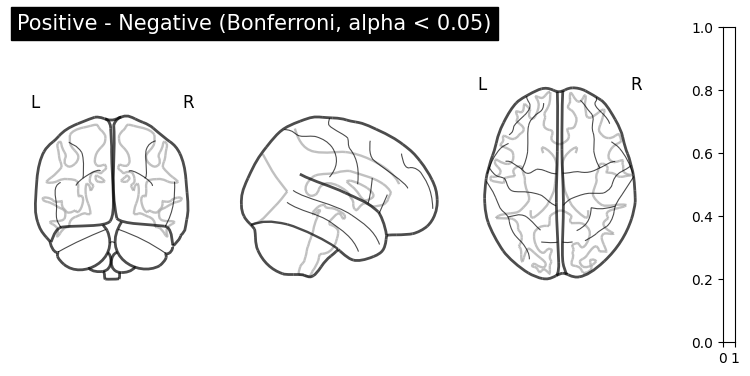

In [12]:
plotting.plot_glass_brain(thresholded_map_pos_neg, colorbar=True,
                          title="Positive - Negative (Bonferroni, alpha < 0.05)",
                          plot_abs=False, cmap='RdBu')
plotting.show()

/work/LauraBockPaulsen#1941/fMRI_analysis/env/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


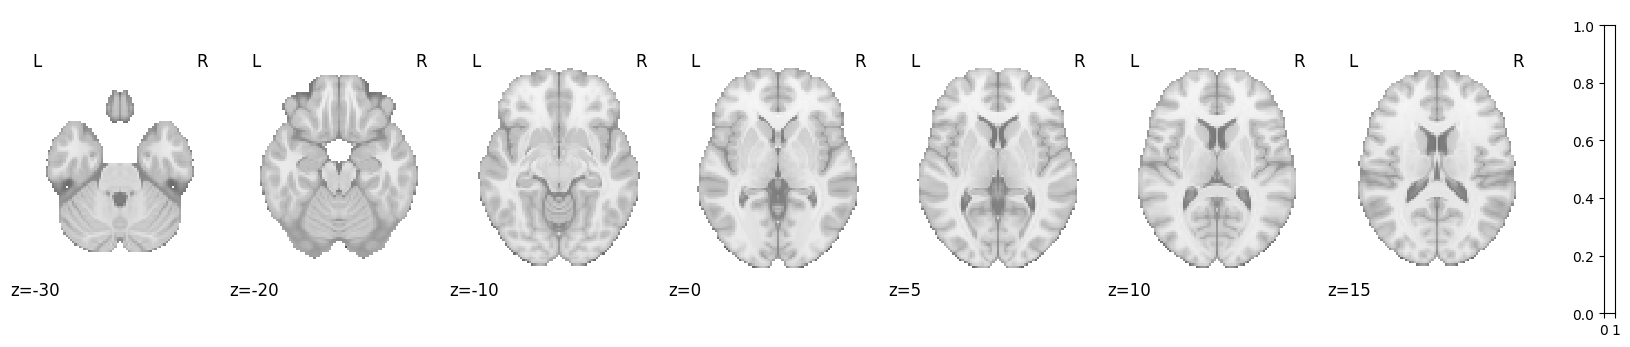

In [13]:
from nilearn.plotting import plot_stat_map

# the auto parameter means that the function determines the threshold "magically by analysis of the img: https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_stat_map.html"

plot_stat_map(thresholded_map_pos_neg, cmap='RdBu',threshold='auto', cut_coords=[-30,-20,-10,0,5,10,15],
              display_mode='z',  black_bg=False,
              title=None) 